# 03_yukawa_lensing
Toy residuals for repulsive Yukawa term.

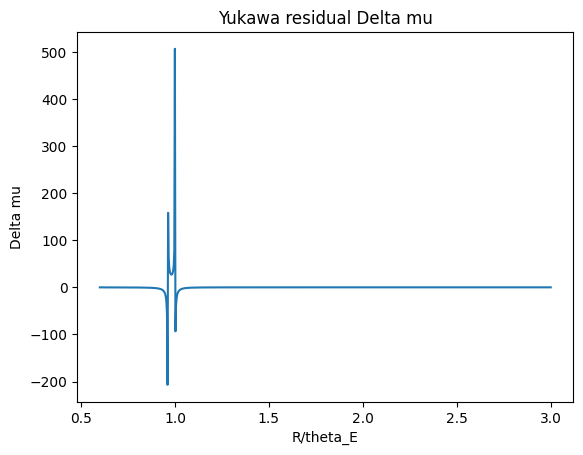

resid_rms 21.26687577273302 parity_flip_count 13
PASS


In [1]:
import numpy as np
import matplotlib.pyplot as plt

theta_E = 1.0
a = 0.25
lam = 0.8
R = np.linspace(0.6, 3.0, 800)

def alpha0(r):
    return theta_E**2/r

def dalpha0(r):
    return -theta_E**2/(r**2)

def alphaY(r):
    return alpha0(r)*(1.0 - a*np.exp(-r/lam))

def dalphaY(r):
    return dalpha0(r)*(1.0 - a*np.exp(-r/lam)) + alpha0(r)*(a*np.exp(-r/lam)/lam)

def mu(alpha_fn, dalpha_fn, r):
    lt = 1.0 - alpha_fn(r)/r
    lr = 1.0 - dalpha_fn(r)
    detA = lt*lr
    return 1.0/detA

mu0 = mu(alpha0, dalpha0, R)
muY = mu(alphaY, dalphaY, R)

mask = np.isfinite(mu0) & np.isfinite(muY) & (np.abs(mu0) < 1e3) & (np.abs(muY) < 1e3)
dmu = muY[mask] - mu0[mask]
resid_rms = float(np.sqrt(np.mean(dmu**2)))
parity_flip = int(np.sum(np.sign(muY[mask]) != np.sign(mu0[mask])))

plt.figure()
plt.plot(R[mask], dmu)
plt.xlabel("R/theta_E")
plt.ylabel("Delta mu")
plt.title("Yukawa residual Delta mu")
plt.show()

print("resid_rms", resid_rms, "parity_flip_count", parity_flip)
assert resid_rms > 1e-5
print("PASS")